In [13]:
import numpy as np
import os.path as osp

from tf_lab.iclr.helper import load_multiple_version_of_pcs
from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from general_tools.in_out.basics import create_dir

In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
class_name = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
top_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/evaluations/gt_data'
create_dir(top_out_dir)

Give me the class type.
chair


'/orions4-zfs/projects/optas/DATA/OUT/iclr/evaluations/gt_data'

In [15]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)

Loading test data.
/orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Splits/single_class_splits/03001627/85_5_10/test.txt
679 pclouds were loaded. They belong in 1 shape-classes.
Loading train data.
/orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Splits/single_class_splits/03001627/85_5_10/train.txt
5761 pclouds were loaded. They belong in 1 shape-classes.
Loading val data.
/orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Splits/single_class_splits/03001627/85_5_10/val.txt
338 pclouds were loaded. They belong in 1 shape-classes.


In [17]:
for key in in_data:
    print key
    out_file = osp.join(top_out_dir, syn_id + '_' + key)
    np.savez(out_file, in_data[key].point_clouds)

test
train
val


In [21]:
from geo_tool import Point_Cloud

(679, 2048, 3)


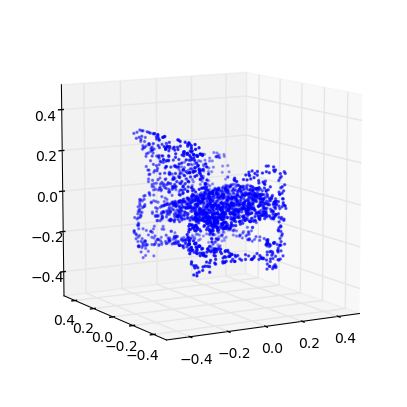

(5761, 2048, 3)


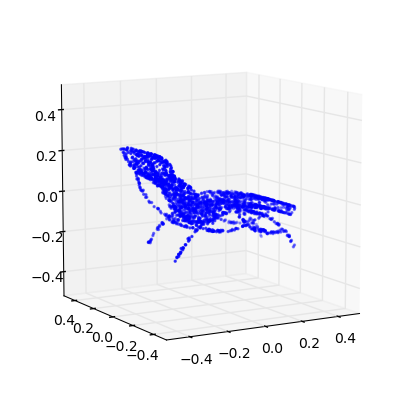

(338, 2048, 3)


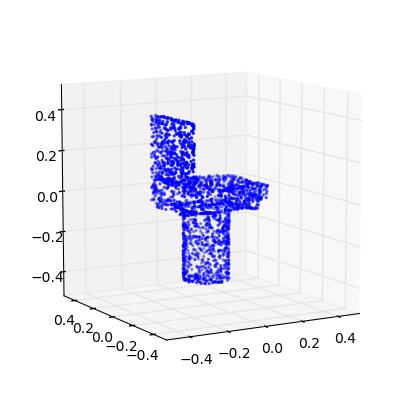

In [25]:
for key in in_data:
    out_file = osp.join(top_out_dir, syn_id + '_' + key)
    sample_data = np.load(out_file + '.npz')
    sample_data = sample_data[sample_data.keys()[0]]
    print sample_data.shape
    Point_Cloud(sample_data[0]).plot()

In [20]:
sample_data.shape

(338, 2048, 3)